In [10]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_X_df, get_y_df, data_prep, NORMALIZER
from model_arch import build_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from matplotlib import pyplot as plt

In [11]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [12]:
data_filepath = "../../../data/csv/plant_data.csv"

In [13]:
X = get_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
X_train, X_test, y_train, y_test = data_prep(X, y)

In [14]:
NORMALIZER.adapt(X_train)

In [15]:
model = build_model(NORMALIZER)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


In [17]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.1
)

Epoch 1/250
5/5 [==============================] - 1s 45ms/step - loss: 6202.7153 - val_loss: 11611.5439
Epoch 2/250
5/5 [==============================] - 0s 9ms/step - loss: 6115.5449 - val_loss: 11471.7119
Epoch 3/250
5/5 [==============================] - 0s 9ms/step - loss: 6036.3770 - val_loss: 11324.7129
Epoch 4/250
5/5 [==============================] - 0s 11ms/step - loss: 5939.9019 - val_loss: 11161.0488
Epoch 5/250
5/5 [==============================] - 0s 11ms/step - loss: 5842.4463 - val_loss: 10968.9414
Epoch 6/250
5/5 [==============================] - 0s 10ms/step - loss: 5723.3945 - val_loss: 10745.7051
Epoch 7/250
5/5 [==============================] - 0s 10ms/step - loss: 5571.9009 - val_loss: 10481.7471
Epoch 8/250
5/5 [==============================] - 0s 10ms/step - loss: 5414.1001 - val_loss: 10164.4131
Epoch 9/250
5/5 [==============================] - 0s 9ms/step - loss: 5218.2339 - val_loss: 9792.2295
Epoch 10/250
5/5 [==============================] - 0s 12ms

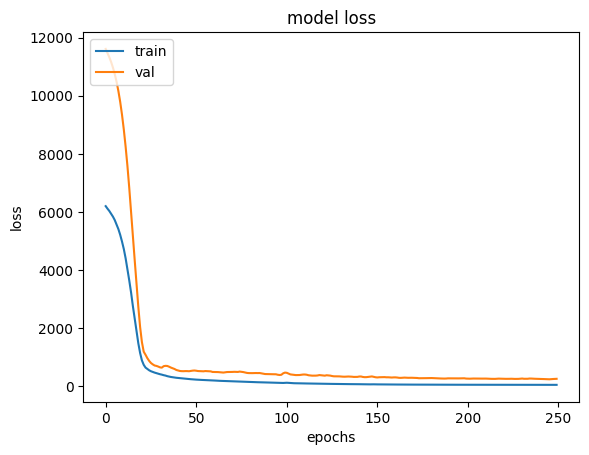

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()